<a href="https://colab.research.google.com/github/deguzmankarladrian/crack-detection/blob/main/crack_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Mar  3 03:25:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qxLwe8q5ql5XxFkvOs52")
project = rf.workspace("university-bswxt").project("crack-bphdr")
dataset = project.version(2).download("yolov8")

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=c1f6e3d0ed575d1776f3daa9bcd1a556e6f06bfaf73c0d69a989c97440c642bf
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to crack-2 in yolov8:: 100%|██████████| 8070/8070 [00:02<00:00, 2849.46it/s]


In [ ]:
!yolo task=segment mode=train model=yolov8l-seg.pt data=/content/crack-2/data.yaml epochs=30 imgsz=640

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/crack-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, w

In [ ]:
!ls {HOME}/runs/segment/train4

args.yaml					    train_batch0.jpg
BoxF1_curve.png					    train_batch1.jpg
BoxP_curve.png					    train_batch2.jpg
BoxPR_curve.png					    train_batch4660.jpg
BoxR_curve.png					    train_batch4661.jpg
confusion_matrix.png				    train_batch4662.jpg
events.out.tfevents.1677814078.e2226a253354.1155.0  val_batch0_labels.jpg
MaskF1_curve.png				    val_batch0_pred.jpg
MaskP_curve.png					    val_batch1_labels.jpg
MaskPR_curve.png				    val_batch1_pred.jpg
MaskR_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights


/content


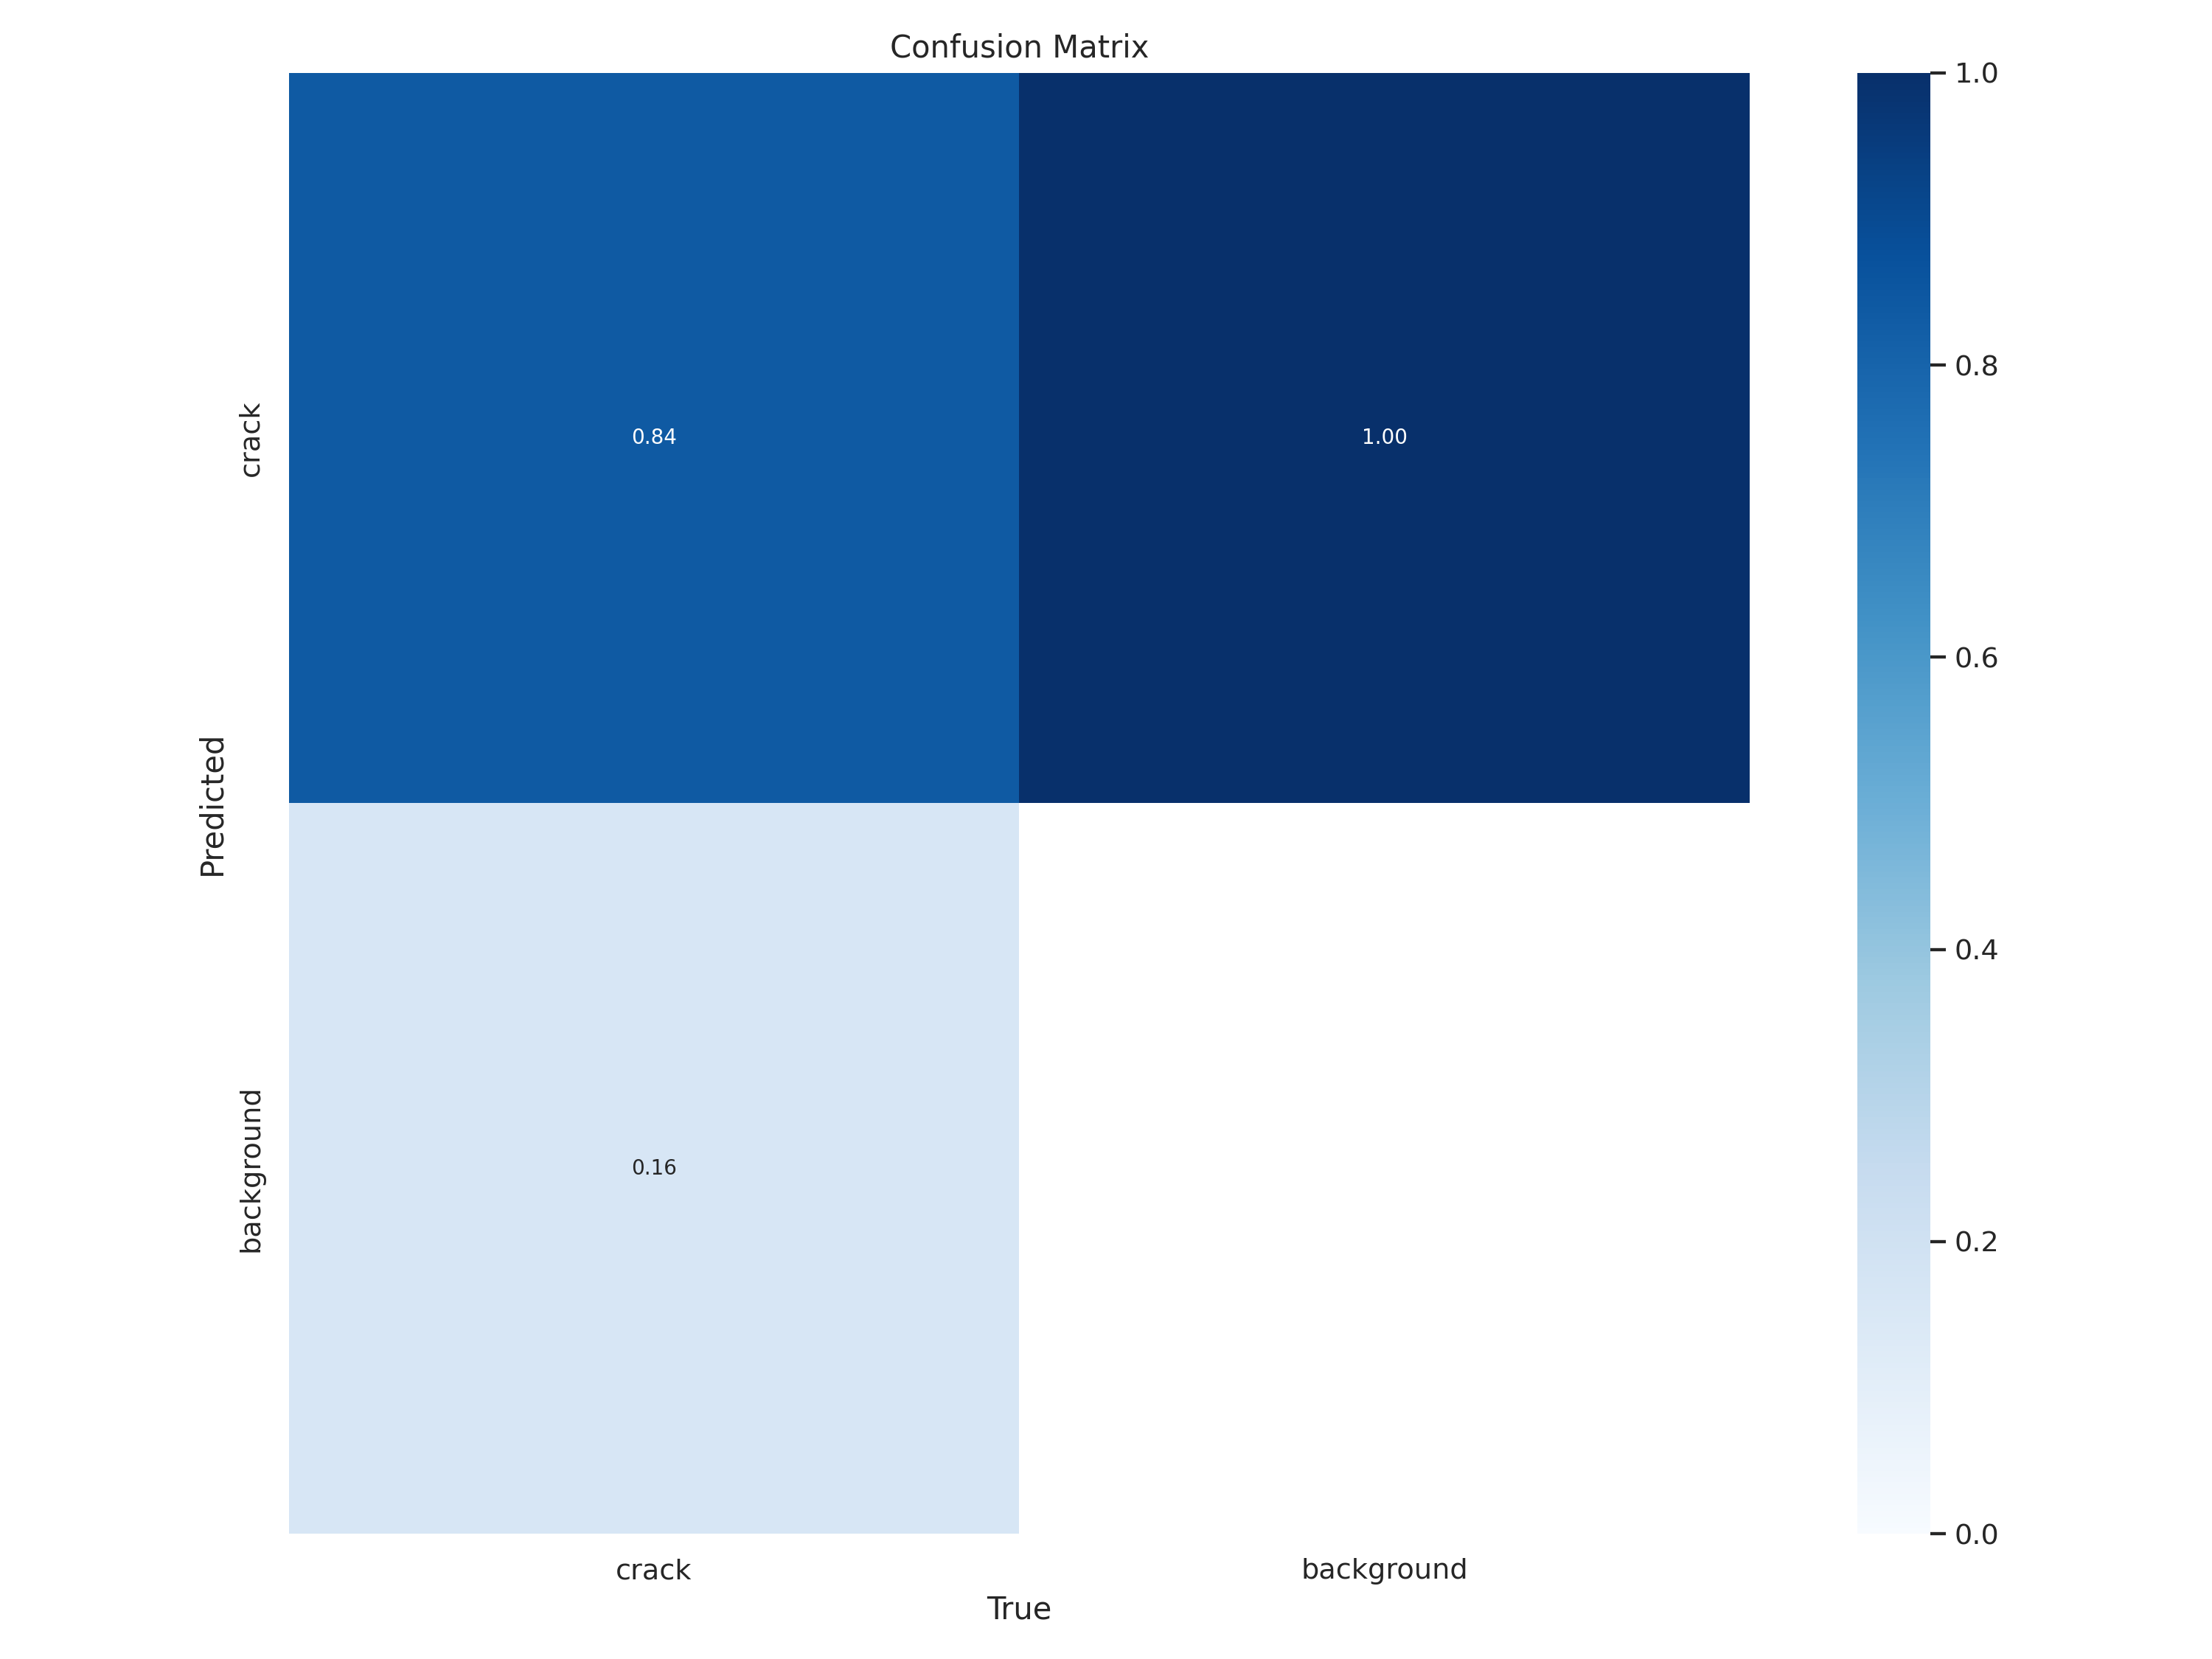

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/confusion_matrix.png', width=1600)

/content


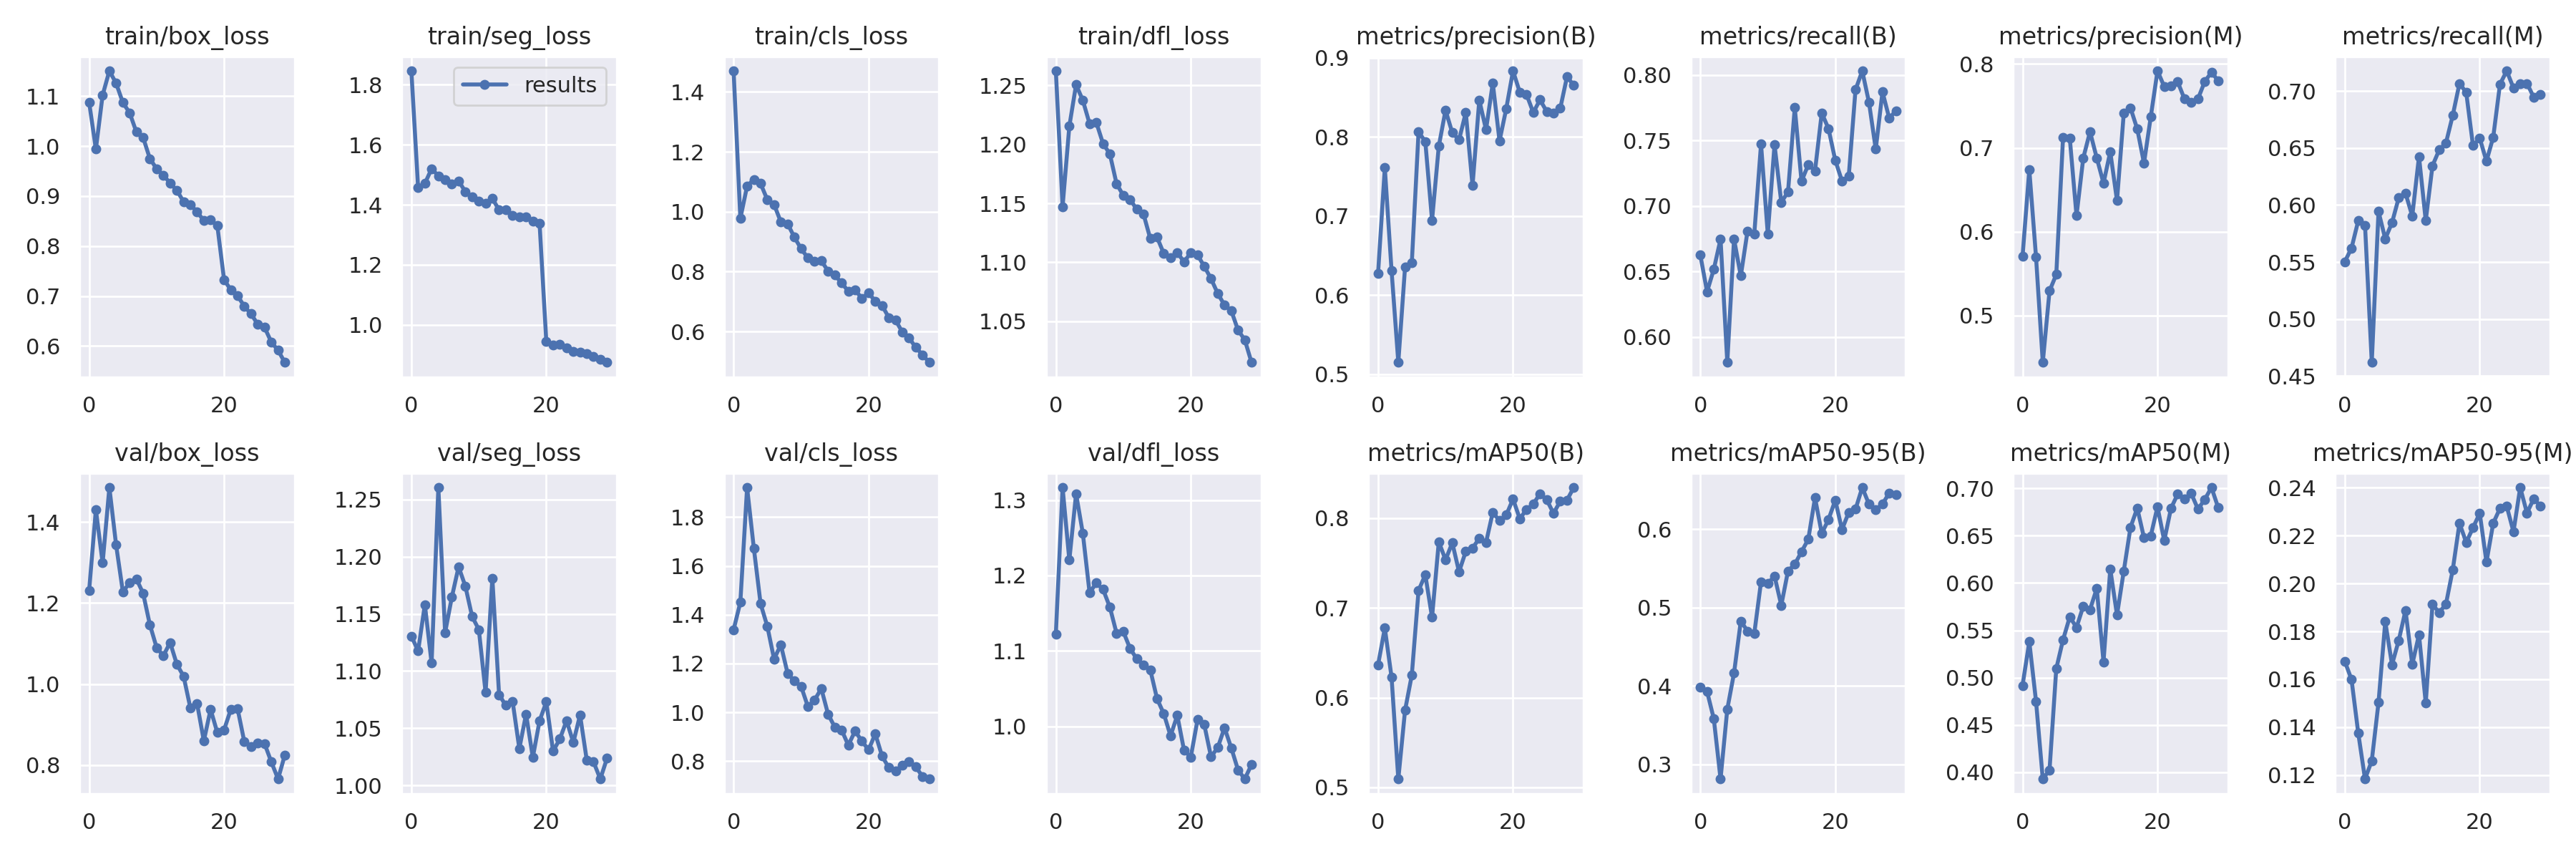

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/results.png', width=1000)

/content


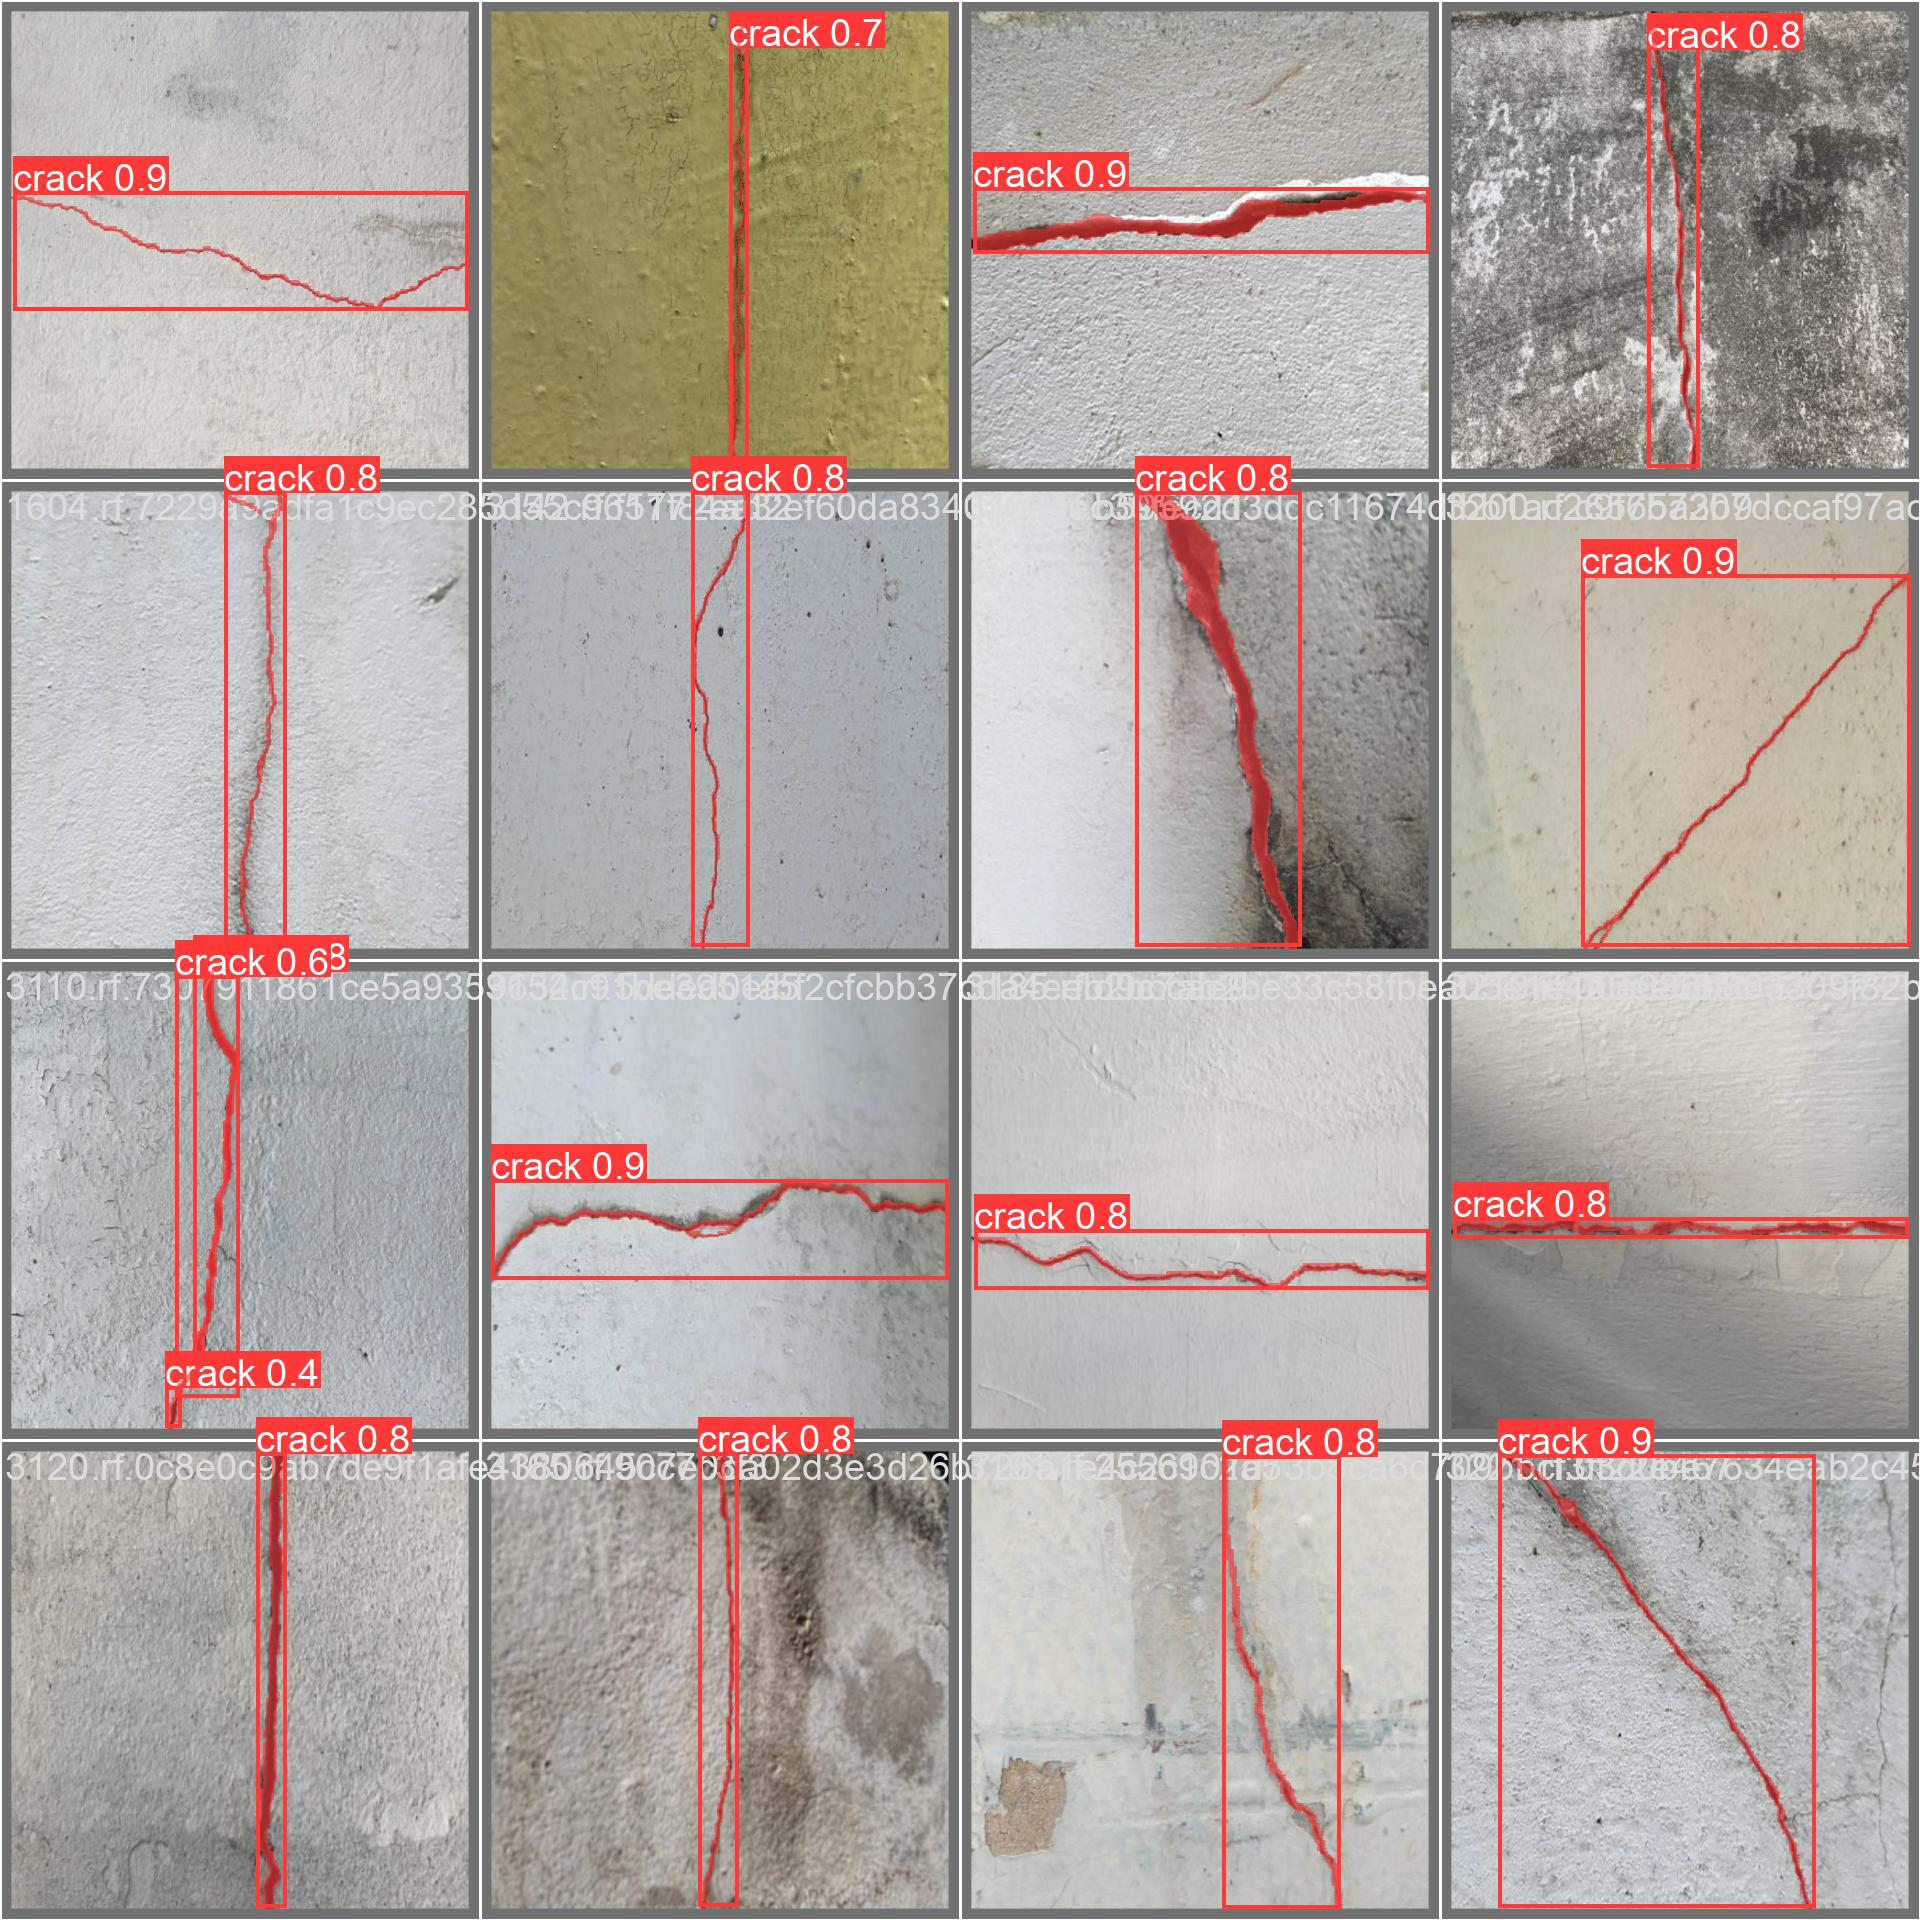

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/val_batch0_pred.jpg', width=1200)

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /content/crack-2/valid/labels.cache... 200 images, 1 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 13/13 [00:14<00:00,  1.10s/it]
                   all        200        249      0.846      0.803      0.827      0.654      0.754      0.715      0.684       0.23
Speed: 2.9ms pre-process, 40.8ms inference, 0.0ms loss, 3.0ms post-process per image


In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

image 1/112 /content/crack-2/test/images/1616.rf.c868709931a671796794fdbb95352c5a.jpg: 640x640 4 cracks, 78.1ms
image 2/112 /content/crack-2/test/images/1675.rf.e3aa3f8d28d0247ef0284dd46dacc29f.jpg: 640x640 1 crack, 48.9ms
image 3/112 /content/crack-2/test/images/1686.rf.809fb1b51c607e5cf787e44ef4ddd7b8.jpg: 640x640 4 cracks, 48.3ms
image 4/112 /content/crack-2/test/images/1706.rf.011d213c21ec78896c36728dcbc156f5.jpg: 640x640 1 crack, 47.3ms
image 5/112 /content/crack-2/test/images/1716.rf.85ea38b36008beaa72c5d8541f734eb0.jpg: 640x640 2 cracks, 43.7ms
image 6/112 /content/crack-2/test/images/1722.rf.38b38f2e833309a4f35bfbf0432dffff.jpg: 640x640 1 crack, 43.4ms
image 7/112 /content/crack-2/test/images/1794.rf.7a03ca09d05e9e2941f768bc8570cb54.jpg: 640x640 1 crack, 41.8ms
image 8/112 /content/crack-2/test/i

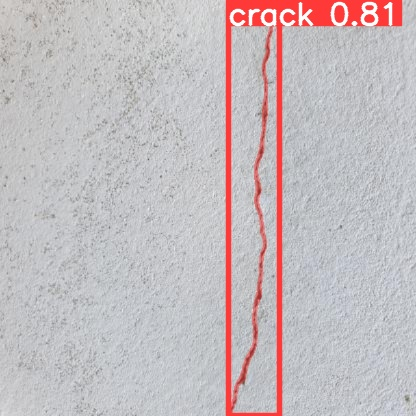

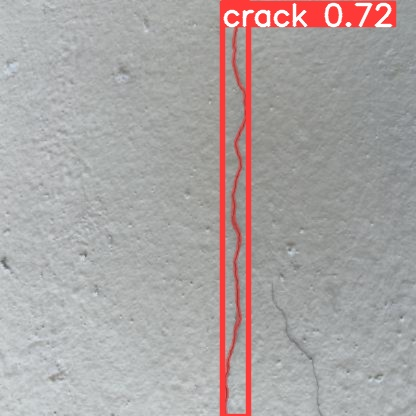

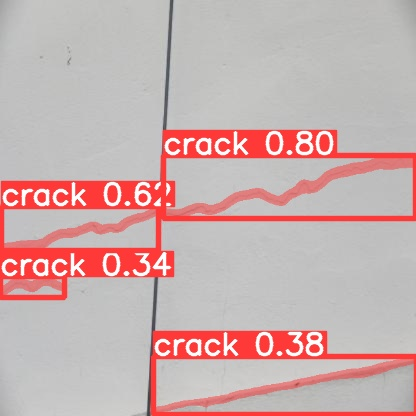

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=400))
      print("\n")

In [ ]:
!yolo export model={HOME}/runs/segment/train4/weights/best.pt

WARNING ⚠️ 'format=' is missing. Using default 'format=torchscript'.
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

PyTorch: starting from /content/runs/segment/train4/weights/best.pt with input shape (1, 3, 640, 640) and output shape (1, 37, 8400) (88.0 MB)

TorchScript: starting export with torch 1.13.1+cu116...
TorchScript: export success ✅ 20.9s, saved as /content/runs/segment/train4/weights/best.torchscript (175.7 MB)

Export complete (28.9s)
Results saved to /content/runs/segment/train4/weights
Predict:         yolo task=segment mode=predict model=/content/runs/segment/train4/weights/best.torchscript -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=segment mode=val model=/content/runs/segment/train4/weights/best.torchscript -WARNING ⚠️ not yet supported for YOLOv8 exported models
Visualize:       https://netron.app
